In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transfers = pd.read_csv('transfermarkt-data/transfers.csv')

# remove hour and minute from transfer_date
transfers["transfer_date"] = pd.to_datetime(transfers["transfer_date"])
transfers["transfer_date"] = transfers["transfer_date"].dt.date


# dropping columns that are not needed
transfers.drop(columns=["player_id", "from_club_id", "to_club_id"], inplace=True)
transfers['transfer_fee'] = transfers['transfer_fee'].fillna(0)

transfers.head()

,transfer_date,transfer_season,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,2026-06-30,25/26,VfB Stuttgart,Bayern Munich,0.0,12000000.0,Alexander Nübel
1,2026-06-30,25/26,1.FSV Mainz 05,Bayern Munich,0.0,4000000.0,Armindo Sieb
2,2026-06-30,25/26,Lazio,Salernitana,0.0,15000000.0,Boulaye Dia
3,2026-06-30,25/26,APO Levadiakos,Panathinaikos,0.0,200000.0,Georgios Katris
4,2026-01-17,25/26,Charlotte,Galatasaray,0.0,8000000.0,Wilfried Zaha


In [3]:
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78887 entries, 0 to 78886
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transfer_date        78887 non-null  object 
 1   transfer_season      78887 non-null  object 
 2   from_club_name       78887 non-null  object 
 3   to_club_name         78887 non-null  object 
 4   transfer_fee         78887 non-null  float64
 5   market_value_in_eur  48858 non-null  float64
 6   player_name          78887 non-null  object 
dtypes: float64(2), object(5)
memory usage: 4.2+ MB


### Retired players

Text(0.5, 1.0, 'Number of players retiring each year')

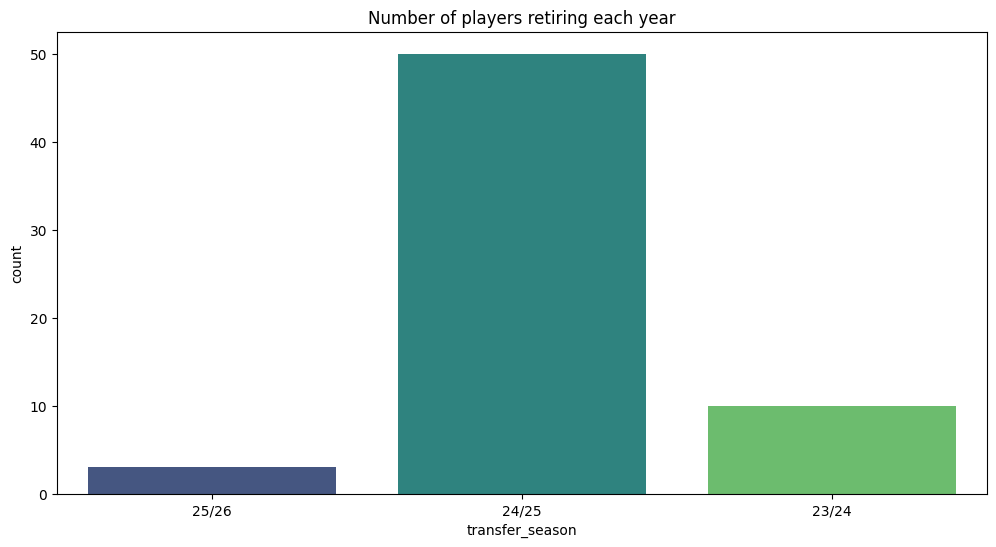

In [4]:
retired = transfers[transfers["to_club_name"] == "Retired"]


plt.figure(figsize=(12, 6))
sns.countplot(x="transfer_season", data=retired, hue="transfer_season", palette="viridis")
plt.title("Number of players retiring each year")

### Largest transfers

Text(0, 0.5, 'Player Name')

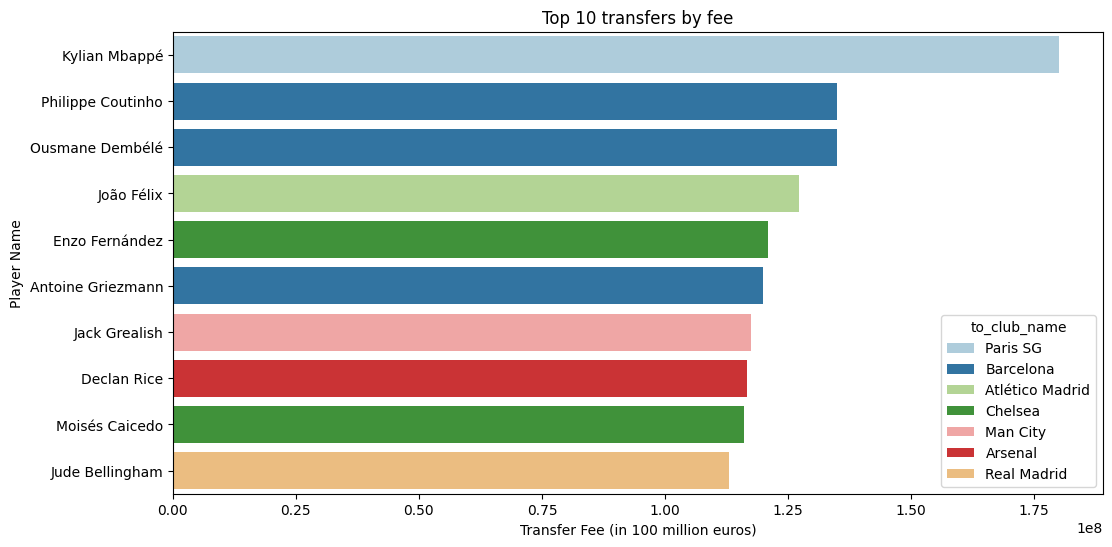

In [5]:
largest = transfers.sort_values("transfer_fee", ascending=False).head(10)
largest = largest[["player_name", "transfer_fee", "to_club_name"]]
largest.set_index("player_name", inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x="transfer_fee", y=largest.index, data=largest, hue="to_club_name", palette="Paired")
plt.title("Top 10 transfers by fee")
plt.xlabel("Transfer Fee (in 100 million euros)")
plt.ylabel("Player Name")

### transfers fee evolution

Text(0, 0.5, 'Average Transfer Fee (in million euros)')

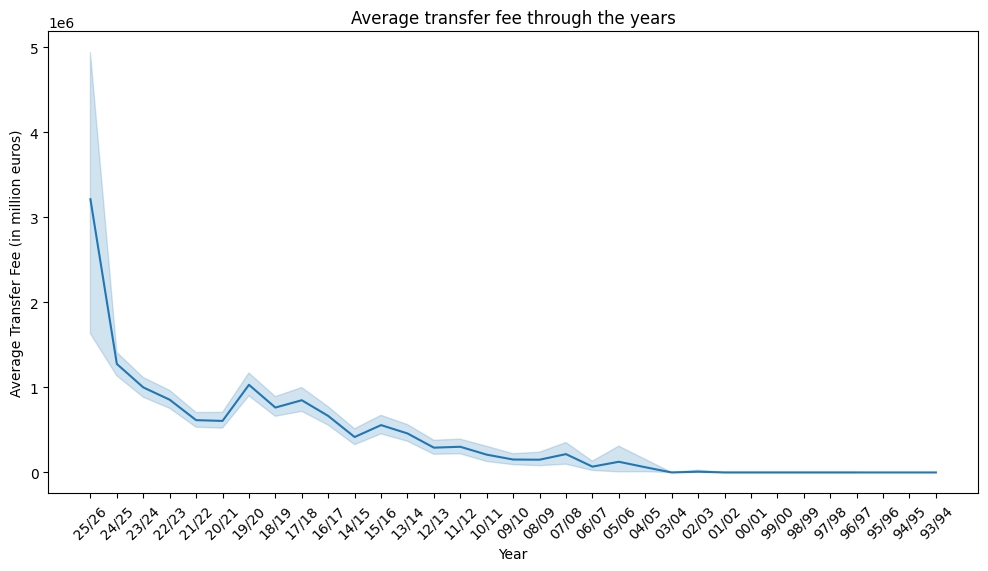

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="transfer_season", y="transfer_fee", data=transfers)
plt.title("Average transfer fee through the years")
plt.xlabel("Year")
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("Average Transfer Fee (in million euros)")

### All transfers involving FC Barcelona

In [7]:
barcelona = transfers[transfers["to_club_name"] == "Barcelona"]

barcelona[['player_name', 'from_club_name','transfer_fee', 'transfer_season']].sort_values(['transfer_season', 'transfer_fee'], ascending=[False, False])


,player_name,from_club_name,transfer_fee,transfer_season
2256,Dani Olmo,RB Leipzig,55000000.0,24/25
2630,Pau Víctor,Girona,2700000.0,24/25
50,Oriol Romeu,Girona,0.0,24/25
76,Clément Lenglet,Atlético Madrid,0.0,24/25
510,Álex Valle,Celtic,0.0,24/25
...,...,...,...,...
72032,Alexis Sánchez,Udinese Calcio,26000000.0,11/12
72142,Thiago Alcántara,Barcelona B,0.0,11/12
75103,Dmytro Chygrynskyi,Shakhtar D.,25000000.0,09/10
76879,Pedro,Barcelona B,0.0,07/08


### Most transfers between a pair of clubs

In [12]:
transfers.groupby(["from_club_name", "to_club_name"]).size().sort_values(ascending=False).head(10)

from_club_name   to_club_name   
Ajax Youth       Ajax U17           81
Benfica U17      Benfica U19        79
Benfica U15      Benfica U17        76
Sporting Sub-15  Sporting U17       75
Benfica Yth      Benfica U15        72
Sporting Yth.    Sporting Sub-15    70
Sporting U17     Sporting U19       67
Barça Youth      Barça U16          65
Paris SG U17     Paris SG U19       65
Dynamo Kyiv U17  Dynamo Kyiv U19    63
dtype: int64

comment: not really relevant because those are pairs of clubs with their own junior academies